In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data = sns.load_dataset('titanic')


<AxesSubplot:xlabel='who', ylabel='survived'>

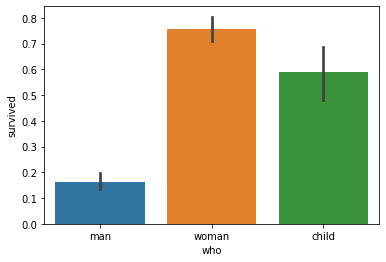

In [77]:
sns.barplot(x="who", y= "survived" ,data=data)

In [78]:
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [79]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
data.sex.map({'male' : 0 ,'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [81]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [82]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [83]:
data["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [110]:
data.head()

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,fare1
0,0,3,male,1,0,S,Third,man,True,NaN,Southampton,no,False,22,7
1,1,1,female,1,0,C,First,woman,False,C,Cherbourg,yes,False,38,71
2,1,3,female,0,0,S,Third,woman,False,NaN,Southampton,yes,True,26,7
3,1,1,female,1,0,S,First,woman,False,C,Southampton,yes,False,35,53
4,0,3,male,0,0,S,Third,man,True,NaN,Southampton,no,True,35,8


In [112]:
# drop the "Cabin" column from the dataframe
data.drop(columns='deck', axis=1)
# replacing the missing values in "Age" column with mean value
data['new_age'].fillna(data['new_age'].mean(), inplace=True)
# replacing the missing values in "Embarked" column with mode value
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

In [114]:
# converting categorical Columns

data.replace({'sex':{'male':0,'female':1}, 'embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
data.head()

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,fare1
0,0,3,0,1,0,0,Third,man,True,NaN,Southampton,no,False,22,7
1,1,1,1,1,0,1,First,woman,False,C,Cherbourg,yes,False,38,71
2,1,3,1,0,0,0,Third,woman,False,NaN,Southampton,yes,True,26,7
3,1,1,1,1,0,0,First,woman,False,C,Southampton,yes,False,35,53
4,0,3,0,0,0,0,Third,man,True,NaN,Southampton,no,True,35,8


In [128]:
X = data[["pclass","sex","new_age","survived"]]
y = data["fare1"]

In [134]:
X.shape

(891, 4)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model = LogisticRegression()
# training the Logistic Regression model with training data
model.fit(X_train, y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = model.predict(X_test)


Accuracy score of training data :  0.27808988764044945


c:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.1787709497206704
